In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Review

In [2]:
top_movies = Table.read_table('top_movies_2017.csv')
top_movies.show(6)

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956


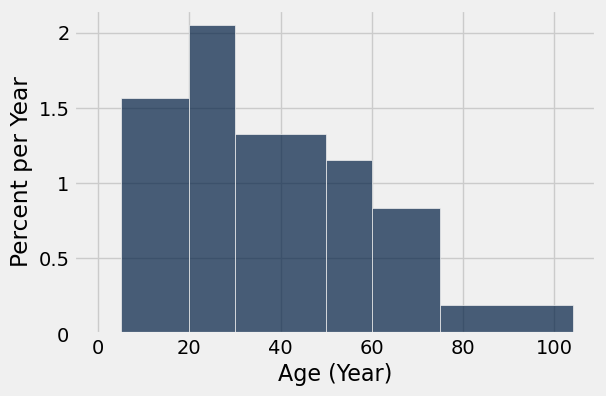

In [11]:
ages = 2025 - top_movies.column('Year')
top_movies = top_movies.with_column('Age', ages)
my_bins = make_array(0, 5, 20, 30, 50, 60, 75, 104)
top_movies.hist('Age', bins = my_bins, unit = 'Year')
plots.show()

**Discussion Question 1**: Compare the bins $[30, 50)$ and $[50, 60)$. 

- Which one has more movies?
- Which one is more crowded?

_[30,50) has both more movies and crowded._ 

**Discussion Question 2:** Can we make a precise statement about what percentage of movies within the $[30, 50)$ bin are between $[30,40)$ years old? 

_No._

**Discussion Question 3:** Can we make a precise statement about what percentage of movies are 30 years or older?

_Yes,44%._

In [14]:
top_movies.bin('Age', bins = my_bins)

bin,Age count
0,0
5,47
20,41
30,53
50,23
60,25
75,11
104,0


## New material

### Create functions with a definition

```python
def functionname(Arguments_Parameters_Expressions_or_Values):  
    """docstring"""
      return return_expression
```

#### **Task:** Create a function called `triple()` that takes an input `x`  and triples it.

In [15]:
def triple(x):
    """triples the input"""
    tripled_x = x * 3
    return tripled_x

In [16]:
triple(3)

9

In [17]:
num = 4

In [18]:
triple(num)

12

In [19]:
triple(num * 5)

60

**Note:** Functions are type-agnostic.

In [20]:
triple(np.arange(4))

array([0, 3, 6, 9])

In [21]:
triple('ha')

'hahaha'

**STOP**

#### **Discussion Question 4:** Can you decipher the function `f`?

- What type of input does `f` take?
- What type of output does `f` produce?
- What's a good name for the function (and what might go in the docstring)?

```python
def f(s):    
    """docstring"""
      return np.round(s / sum(s) * 100, 2)
```

In [22]:
ans1 = 'array of numbers'
ans2 = 'array of percent'
ans3 = 'cal_per_arr'

In [23]:
def percents(values):
    """Returns an array where each element is shown as a percent of the total"""
    return np.round(values / sum(values) * 100, 2)

In [24]:
percents(make_array(1,2,3,4))

array([ 10.,  20.,  30.,  40.])

### Use functions on table columns with `apply` 

#### **Task:** Create a function called `age()` that takes the `year` of birth of a person and produces their age in years.

In [25]:
def age(year):
    return 2025 - year

#### **Task:** Create a function called `name_and_age()` that:
- takes a person's `name` and `year` of birth (two arguments). 
- produces a sentence that states how old they are (such as, "Jeremy is 26 years old").

In [26]:
def name_and_age(name,year):
    my_age = age(year)
    return name +  " is " + str(my_age) + " years old"

In [27]:
name_and_age("Jeremy", 1999)

'Jeremy is 26 years old'

#### **Task:** use the `name_and_age()` function on a table with `apply`!

In [28]:
fam = Table().with_columns(
    'First Name', make_array('Jeremy', 'Olivia', 'Data 8'),
    'Birth Year', make_array(1999, 2005, 2015)
)
fam

First Name,Birth Year
Jeremy,1999
Olivia,2005
Data 8,2015


In [29]:
fam.apply(age, 'Birth Year')

array([26, 20, 10])

In [30]:
fam.apply(name_and_age, 'First Name', 'Birth Year')

array(['Jeremy is 26 years old', 'Olivia is 20 years old',
       'Data 8 is 10 years old'],
      dtype='<U22')

In [31]:
fam.with_columns("Statement",
                 fam.apply(name_and_age, 'First Name', 'Birth Year'))

First Name,Birth Year,Statement
Jeremy,1999,Jeremy is 26 years old
Olivia,2005,Olivia is 20 years old
Data 8,2015,Data 8 is 10 years old


### **Challenge Task:**

Pythagoras's Theorem: If $x$ and $y$ denote the lengths of the right-angle sides, then the hypotenuse length $h$ satisfies:

$$ h^2 = x^2 + y^2 \qquad \text{which implies}\qquad \hspace{20 pt} h = \sqrt{ x^2 + y^2 } $$

Write a function `hypotenuse` that takes in right angle sides with length `x` and `y` and calculates the hypotenuse.

In [32]:
def hypotenuse(x, y):
    """finds the hypotenuse of a right triangle with right-angle sides of length x and y"""
    hypot_squared = (x ** 2 + y ** 2)
    hypot = hypot_squared ** 0.5
    return hypot

In [33]:
hypotenuse(1, 2)

2.23606797749979

In [34]:
hypotenuse(3, 4)

5.0

In [35]:
hypotenuse(9, 12)

15.0

We could've typed the body all in one line. Do you find this more readable or less readable than the original version?

In [36]:
def hypotenuse(x,y):
    """finds the hypotenuse of a right triangle with right-angle sides of length x and y"""
    return (x ** 2 + y ** 2) ** 0.5